
# Swedish Auto Insurance Dataset
The Swedish Auto Insurance Dataset involves predicting the total payment for all claims in thousands of Swedish Kronor, given the total number of claims.

It is a regression problem. It is comprised of 63 observations with 1 input variable and one output variable. The variable names are as follows:

1)Number of claims.
2)Total payment for all claims in thousands of Swedish Kronor.

##  Standard Library Includes
### We will be importing the below libraries

numpy - NumPy is the fundamental package for scientific computing with Python

pandas - Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools

matplotlib - 2D plotting library which produces publication quality figures in a variety of formats and interactive environments across platforms

seaborn - Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics

sklearn - Library that implements a range of machine learning, preprocessing, cross-validation and visualization algorithms

## Import Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from pandas import read_excel
from pandas.plotting import scatter_matrix
from pickle import dump
from pickle import load
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error


## Load the Dataset

In [6]:
filename =('C:\Users\SHIVAPRASAD\Desktop\datasets\swedish_insurance.xlsx')
names = ['Number of claims ', 'Total payment for all claims']
dataframe = read_excel(filename, names=names)

## Sumarizing the Dataset

In [6]:
#Shape
print dataframe.shape  # Display the no.of rows and no.r of columns in the dataset

(62, 2)


In [7]:
#Head
print dataframe.head() # Display the first 5 values of the dataset

   Number of claims   Total payment for all claims
0                 19                          46.2
1                 13                          15.7
2                124                         422.2
3                 40                         119.4
4                 57                         170.9


In [8]:
#Tail
print dataframe.tail() # Display the last 5 values of the dataset

    Number of claims   Total payment for all claims
57                  9                          87.4
58                 31                         209.8
59                 14                          95.5
60                 53                         244.6
61                 26                         187.5


In [9]:
#Statistical summary
print dataframe.describe() #Display the statistical summary of the dataset

       Number of claims   Total payment for all claims
count          62.000000                     62.000000
mean           21.532258                     93.440323
std            20.823787                     79.424284
min             0.000000                      0.000000
25%             7.250000                     38.475000
50%            14.000000                     71.300000
75%            28.500000                    137.150000
max           124.000000                    422.200000


In [15]:
#data types
print dataframe.dtypes # Dispay the data types float,int,object likewise

Number of claims                  int64
Total payment for all claims    float64
dtype: object


## Visualizing the dataset

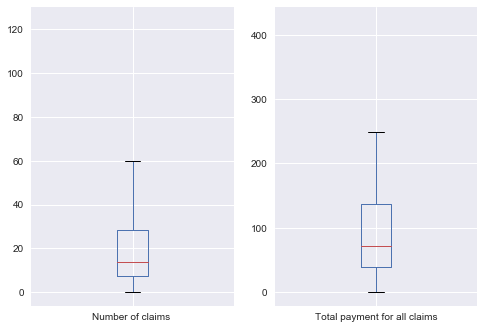

In [27]:
#Box and the whisker plots(for visualizing the minimum and maximum values)
dataframe.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.show()

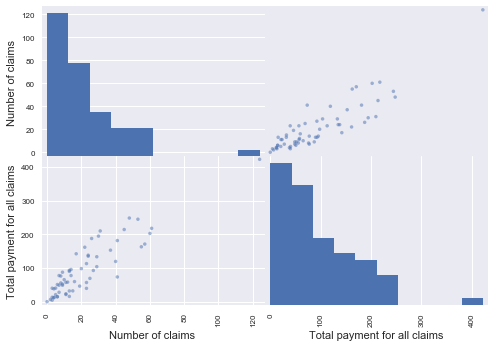

In [9]:
# Scatterplot Matrix (This plot will help to spot structured relationship between input variables)
scatter_matrix(dataframe)
plt.show()

## Evaluating some Algorithm
Splitting the dataset in Train and Test Sets.

Below Scatter plot will show the distribution of training and testing samples.

In [7]:
# Split-out validation dataset
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


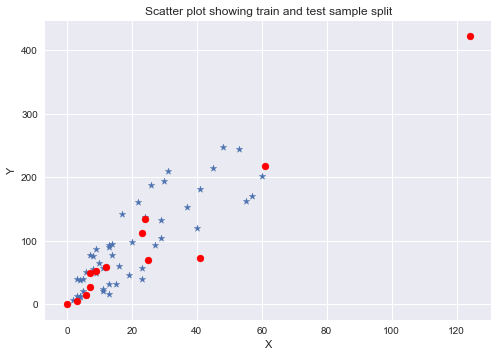

In [24]:
#scatter plot matrix showing the train and test sample split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=7)
fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot showing train and test sample split')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_validation,Y_validation,c='red',label='Test')
plt.show()

In [52]:
#Evaluation of the Liner regression algorithm for thr accuracy using train and test

array = dataframe.values
X = array[:,0:1]
#For the input features, we can select all rows and all columns except the last one by specifying ‘:’ for in the rows index, 
#and :-1 in the columns index.
Y = array[:,1]
#For the output column, we can select all rows again using ‘:’ and index just the last column by specifying the -1 index.
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LinearRegression()
model.fit(X_train, Y_train) # Fit a linear model.
result = model.score(X_test, Y_test) 
#Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.

print("Accuracy: %.2f%%") % (result*100.0)  # %.2f means to print the only 2 decimal values

0.877601538283
Accuracy: 87.76%


## Make Predictions

In [60]:
#Predictions for the RMSE value
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train)  # Fit a linear model.
Y_pred = regr_fin.predict(X_test) # predict X_test value from linear regression model 

#rmse = np.sqrt(metrics.mean_squared_error(Y_pred,Y_test)) use any one below line or this line for getting rmse

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print 'RMSE for Testing set : %f' % (rmse)

#print 'RMSE for Testing set : %f' % (rms)

RMSE for Testing set : 35.282655


## Finalizing the model

In [61]:
#finalizing the model from pickle
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LinearRegression()
model.fit(X_train, Y_train) #fit into the linear regression model

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb')) #syntax for wrinting into the disk

# some time later...

# load the model from disk
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train) # Fit a linear model.
Y_pred = regr_fin.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_pred,Y_test)) 
#from numpy importing np to calculate sqrt,& from sklearn we imported the mean_squared_error
print 'RMSE for Testing set : %f' % (rmse)

RMSE for Testing set : 35.282655
